In [1]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt

Iteration 0: Step length = 0.002942971003165539
Iteration 0: Difference between alpha updates = 0.012247448713915891
Iteration 1: Step length = 0.006034423676675755
Iteration 1: Difference between alpha updates = 0.02535251472040286
Iteration 2: Step length = 0.07442160173361251
Iteration 2: Difference between alpha updates = 0.03225737130594169
Iteration 3: Step length = 0.023575756824451576
Iteration 3: Difference between alpha updates = 0.3168312029647688
Iteration 4: Step length = 0.014032102766739107
Iteration 4: Difference between alpha updates = 0.21781990031645154
Iteration 5: Step length = 0.034448107287426165
Iteration 5: Difference between alpha updates = 0.04174458840741205
Iteration 6: Step length = 0.06690701851385233
Iteration 6: Difference between alpha updates = 0.06725391519618289
Iteration 7: Step length = 0.39819609284540053
Iteration 7: Difference between alpha updates = 0.07832089806728018
Iteration 8: Step length = 0.1252618498634862
Iteration 8: Difference betwe

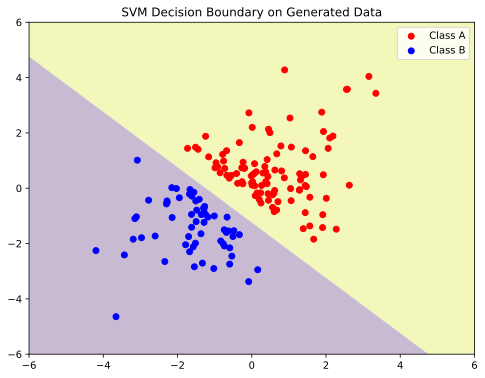

In [2]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 100
n_B = 60
margin = 0.5

listA, listB = TestLinear(w, b, n_A, n_B, margin)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, lr=0.01, mode="dual")
svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3)
plt.scatter(X_A[:, 0], X_A[:, 1], color="red", label="Class A")
plt.scatter(X_B[:, 0], X_B[:, 1], color="blue", label="Class B")
plt.legend()
plt.title("SVM Decision Boundary on Generated Data")
plt.show()
